In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Zaid\Desktop\ADS1001\housing.csv')
data=data.dropna()
data = pd.DataFrame(data)
data.rename(columns={'MEDV':'PRICE'}, inplace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Removing the two useless variables
data.drop(['B'], axis = 1)
# axis=1 means along "columns". It's a column-wise operation.
# axis diagram explanation on google docs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
data.drop(['CHAS'], axis = 1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# Predicting one variable against Price
# Divide Data into attributes = independant variables and labels = dependant variables
# We want to predict 
# Our attribute in this case consist of 'CRIM'
# Our Lab will be 'Price'
X = data['CRIM'].values.reshape(-1,1)
y = data['PRICE'].values.reshape(-1,1)

# reshape() gives a new shape to an array without changing its data , here we reshape the CRIM and PRICE data



In [6]:
#splitting data into training and testing 
# here, 80% of data is the training set and 20% is the testing set
# The test_size variable is where we actually specify the proportion of the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#time to train algorithm
# For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

# : fitting is equal to training. Then, after it is trained, the model can be used to make predictions, 
# usually with a .predict() method call.
# Fitting your model to (i.e. using the .fit() method on) the training data is essentially the training part of the modeling process. 
# It finds the coefficients for the equation specified via the algorithm being used


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

# This means that for every one unit of change in CRIM, the change in the Price is about 46%.

[24.19243974]
[[-0.46674755]]


In [9]:
#Now that we have trained our algorithm, it’s time to make some predictions. 
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 
# To make predictions on the test data, execute the following script:

y_pred = regressor.predict(X_test)


In [10]:
# Now compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,22.6,24.161056
1,50.0,19.883286
2,23.0,24.139114
3,8.3,12.616307
4,21.2,24.166087
...,...,...
97,24.7,24.182848
98,14.1,21.974283
99,18.7,24.122745
100,28.1,24.126852


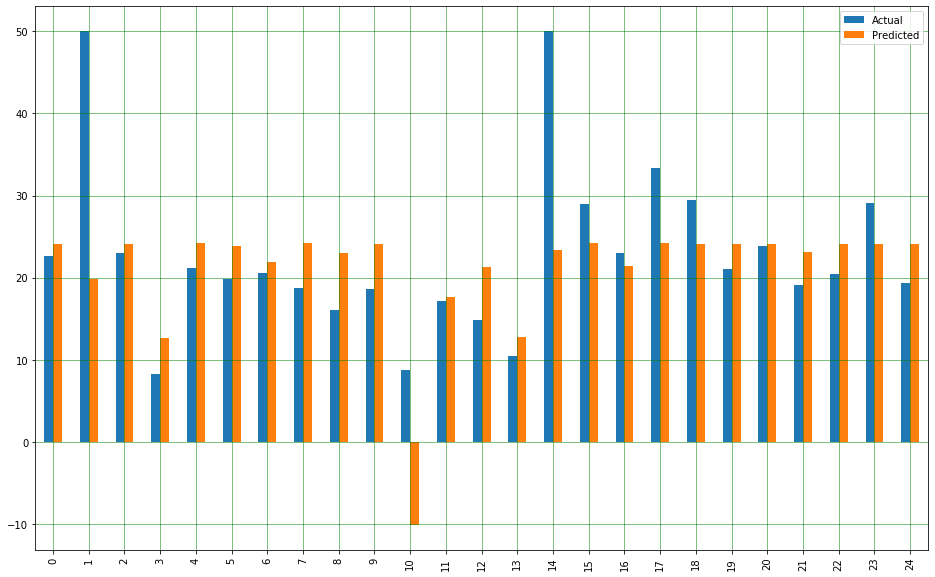

In [11]:
# We can also visualize comparison result as a bar graph using the below script 
# As the number of records is huge, for representation purpose I’m taking just 25 records.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='yellow')
plt.show()
#As you can see, our algorithm is not very accurate at all

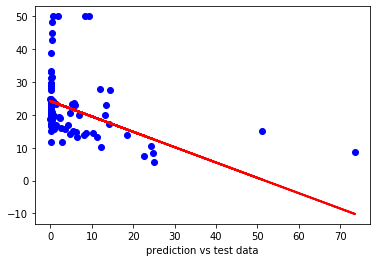

In [12]:
# Let's plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('prediction vs test data')    
plt.show()
# The algorithm is mostly/not very accurate

In [13]:
# The final step is to evaluate the performance of the algorithm. 
# This step is particularly important to compare how well different algorithms perform on a particular dataset.
#  For regression algorithms, three evaluation metrics are commonly used:
# 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
# 2. Mean Squared Error (MSE) is the mean of the squared errors 
# 3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# RMSE also means the standard deviation of the residuals 
# Some lengthy complex equations represent each of these evaluations

# the difference between the observed value of the dependent variable (y) 
# and the predicted value (ŷ) is called the residual
# Residual = Observed value - Predicted value. e = y - ŷ

# Luckily, we don’t have to perform these calculations manually. 
# The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
# Let’s find the values for these metrics using our test data.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

# The mean squared error tells you how close a regression line is to a set of points. 
# It does this by taking the distances from the points to the regression line (these distances are the “errors”) 
# and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. 
# It’s called the mean squared error as you’re finding the average of a set of errors.
# The smaller the means squared error, the closer you are to finding the line of best fit.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  


# THe RMSE is a square root of the mean squared error, so it is a mean of the actual error/distances of predictions to the
# line of best fit created
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# You can see that the value of root mean squared error is 8.74, 
# which is much more (39%)/ less than the mean actual prices  (22.56)
# meaning that the model prediced prices are generally dispersed over 22.56±8.74, 
# the smaller the root mean squared error is, the more accurate the model is
# since that means the models predictions/prices are closer to the mean of the actual price
# in a graph a low RMSE, means that the predictions are closer to the line of best fit of the linearly regressed model

# Since our SMRE is so large compared to our mean
# That means that our algorithm was not very accurate and cannot make reasonably good predictions.
# Or in this case, the variable the algorithm is based on (CRIM) is not especially directly related to PRICES

Mean Absolute Error: 6.119866146637962
Mean Squared Error: 76.38674157646072
Root Mean Squared Error: 8.739950890963902


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# We have just completed simple linear regression/ linear regression on only one variable against another. 